In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Parametre tanımlamaları
indirim_faktoru = 0.9 #gamma
ogrenme_orani = 0.5 #alpha
bolum_sayisi = 1000 #egitim icin bolum sayisi
satir_sayisi, sutun_sayisi = 3, 3
hedef_durum = (0, 2)
baslangic_durumu = (2, 0)
engel_durumu = (1, 1)
hareketler = ['up', 'right', 'down', 'left']  

# Q-tablosunu başlangıç değerleri ile oluşturma
Q = np.zeros((satir_sayisi, sutun_sayisi, len(hareketler)))

In [16]:
# Engel durumunu kontrol etme fonksiyonu
def engel_mi(durum):
    return durum == engel_durumu

In [17]:
# Mevcut durum ve harekete göre sonraki durumu hesaplama
def sonraki_durumu_hesapla(mevcut_durum, hareket):
    satir, sutun = mevcut_durum
    if hareket == 'up' and satir > 0:
        return (satir - 1, sutun)
    elif hareket == 'right' and sutun < sutun_sayisi - 1:
        return (satir, sutun + 1)
    elif hareket == 'down' and satir < satir_sayisi - 1:
        return (satir + 1, sutun)
    elif hareket == 'left' and sutun > 0:
        return (satir, sutun - 1)
    return mevcut_durum  # Geçersiz hareketler için durum değişmez

In [18]:

def hareket_sec(durum, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.choice(hareketler)  
    else:
        # En iyi hareketi mevcut Q-değerlerine göre seç
        durum_hareketleri = Q[durum[0], durum[1], :]
        max_hareketler = np.where(durum_hareketleri == np.max(durum_hareketleri))[0]
        return hareketler[np.random.choice(max_hareketler)]  # En iyiyi seç


In [19]:
# Q-learning algoritmasının uygulanması
for bolum in range(bolum_sayisi):
    durum = baslangic_durumu
    while durum != hedef_durum:
        hareket = hareket_sec(durum)
        sonraki_durum = sonraki_durumu_hesapla(durum, hareket)
        odul = 1 if sonraki_durum == hedef_durum else 0
        hareket_index = hareketler.index(hareket)
        Q[durum][hareket_index] = Q[durum][hareket_index] + ogrenme_orani * (odul + indirim_faktoru * np.max(Q[sonraki_durum]) - Q[durum][hareket_index])
        durum = sonraki_durum
        # Ara adımların yazdırılması
        print(f"Bölüm: {bolum+1}, Durum: {durum}, Hareket: {hareket}, Ödül: {odul}")

Bölüm: 1, Durum: (2, 1), Hareket: right, Ödül: 0
Bölüm: 1, Durum: (2, 2), Hareket: right, Ödül: 0
Bölüm: 1, Durum: (1, 2), Hareket: up, Ödül: 0
Bölüm: 1, Durum: (0, 2), Hareket: up, Ödül: 1
Bölüm: 2, Durum: (2, 1), Hareket: right, Ödül: 0
Bölüm: 2, Durum: (2, 0), Hareket: left, Ödül: 0
Bölüm: 2, Durum: (2, 0), Hareket: left, Ödül: 0
Bölüm: 2, Durum: (2, 1), Hareket: right, Ödül: 0
Bölüm: 2, Durum: (2, 0), Hareket: left, Ödül: 0
Bölüm: 2, Durum: (2, 1), Hareket: right, Ödül: 0
Bölüm: 2, Durum: (2, 2), Hareket: right, Ödül: 0
Bölüm: 2, Durum: (1, 2), Hareket: up, Ödül: 0
Bölüm: 2, Durum: (0, 2), Hareket: up, Ödül: 1
Bölüm: 3, Durum: (2, 0), Hareket: down, Ödül: 0
Bölüm: 3, Durum: (1, 0), Hareket: up, Ödül: 0
Bölüm: 3, Durum: (1, 0), Hareket: left, Ödül: 0
Bölüm: 3, Durum: (0, 0), Hareket: up, Ödül: 0
Bölüm: 3, Durum: (0, 1), Hareket: right, Ödül: 0
Bölüm: 3, Durum: (0, 2), Hareket: right, Ödül: 1
Bölüm: 4, Durum: (2, 0), Hareket: left, Ödül: 0
Bölüm: 4, Durum: (2, 1), Hareket: right, Ödü

In [20]:
# Politikanın Q değerlerine göre tanımlanması
politika = np.full((satir_sayisi, sutun_sayisi), ' ', dtype='<U5')
for satir in range(satir_sayisi):
    for sutun in range(sutun_sayisi):
        durum = (satir, sutun)
        if durum == baslangic_durumu:
            politika[satir][sutun] = 'Başla'
        elif durum == hedef_durum:
            politika[satir][sutun] = 'Hedef'
        elif durum == engel_durumu:
            politika[satir][sutun] = 'Engel'
        else:
            en_iyi_hareket_index = np.argmax(Q[durum])
            politika[satir][sutun] = hareketler[en_iyi_hareket_index]

In [21]:
# Politikanın ve Q değerlerinin yazdırılması
print("\nÖğrenilen politika:")
for row in politika:
    print(' '.join(row))

print("\nQ-tablosu değerleri:")
for satir in range(satir_sayisi):
    for sutun in range(sutun_sayisi):
        durum = (satir, sutun)
        print(f"DURUM {durum}, Q DEĞERLERİ: {Q[durum].round(2)}")


Öğrenilen politika:
right right Hedef
up Engel up
Başla up up

Q-tablosu değerleri:
DURUM (0, 0), Q DEĞERLERİ: [0.81 0.9  0.73 0.81]
DURUM (0, 1), Q DEĞERLERİ: [0.9  1.   0.81 0.81]
DURUM (0, 2), Q DEĞERLERİ: [0. 0. 0. 0.]
DURUM (1, 0), Q DEĞERLERİ: [0.81 0.81 0.66 0.73]
DURUM (1, 1), Q DEĞERLERİ: [0.9  0.56 0.71 0.56]
DURUM (1, 2), Q DEĞERLERİ: [0.94 0.   0.   0.  ]
DURUM (2, 0), Q DEĞERLERİ: [0.73 0.73 0.66 0.66]
DURUM (2, 1), Q DEĞERLERİ: [0.81 0.   0.   0.33]
DURUM (2, 2), Q DEĞERLERİ: [0.22 0.   0.   0.  ]


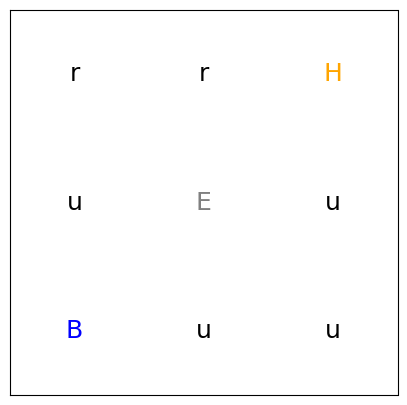

In [22]:
# Görselleştirme
plt.figure(figsize=(5, 5))
renkler = {'Başla': 'blue', 'Hedef': 'orange', 'Engel': 'gray'}  
for satir in range(satir_sayisi):
    for sutun in range(sutun_sayisi):
        durum = (satir, sutun)
        plt.text(sutun, satir, politika[satir][sutun][0], va='center', ha='center', 
                 color=renkler.get(politika[satir][sutun], 'black'), fontsize=18)

plt.xlim(-0.5, sutun_sayisi-0.5)
plt.ylim(satir_sayisi-0.5, -0.5)
plt.grid()
plt.xticks([])
plt.yticks([])
plt.show()
